# Approach to the problem

1. Load the data and libraies
2. Declare the model and layers
      * Sequential
      * Dense , Dropout
      * Number of Neurons , Activation Function
4.Compile the model
   *Optimizer (SGD, Adam)
   * Loss function(Cross Entropy, MSE , RMSE )
   * Metrics (Accuracy , F1 , Precision , Recall )
4.Fit the model
   * Pass X train and Y train
   * Pass X test and Y test
   * Epochs
   * Batch Size
5. Evaluate the model
6. Increasing neurons for better performance
   * Repeat the model training steps
7. Increasing the number of epochs for a better performance
   * Repeat the model training steps
8. Save the model
9. Deployment

In [1]:
import warnings
warnings.filterwarnings("ignore")

#  1). Load the data and libraries

In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/

In [3]:
!unzip '/content/output_folder.zip'

Archive:  /content/output_folder.zip
   creating: train/
   creating: val/
   creating: val/0/
   creating: val/1/
   creating: val/2/
   creating: val/3/
   creating: val/4/
   creating: val/5/
   creating: val/6/
   creating: val/7/
   creating: val/8/
   creating: val/9/
   creating: val/a/
   creating: val/b/
   creating: val/c/
   creating: val/d/
   creating: val/e/
   creating: val/f/
   creating: val/g/
   creating: val/h/
   creating: val/i/
   creating: val/j/
   creating: val/k/
   creating: val/l/
   creating: val/m/
   creating: val/n/
   creating: val/o/
   creating: val/p/
   creating: val/q/
   creating: val/r/
   creating: val/s/
   creating: val/t/
   creating: val/u/
   creating: val/v/
   creating: val/w/
   creating: val/x/
   creating: val/y/
   creating: val/z/
  inflating: val/5/hand2_5_bot_seg_4_cropped.jpeg  
  inflating: val/5/hand5_5_bot_seg_5_cropped.jpeg  
  inflating: val/5/hand3_5_dif_seg_5_cropped.jpeg  
  inflating: val/5/hand2_5_bot_seg_3_cropped.jpeg

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
import tensorflow as tf
import numpy as np
import gradio as gr

In [5]:
def load_data(train_dir, val_dir):
    return train_dir, val_dir
train_dir, val_dir = load_data('/content/train', '/content/val')

In [6]:
def create_dataset(directory, batch_size, image_size):
  dataset = image_dataset_from_directory(
      directory,
      batch_size=batch_size,
      class_names=['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'],
      image_size=image_size,
      seed=123
  )
  return dataset
train_dataset = create_dataset(train_dir, batch_size=64, image_size=(160, 160))
val_dataset = create_dataset(val_dir, batch_size=64, image_size=(160, 160))


Found 2414 files belonging to 36 classes.
Found 905 files belonging to 36 classes.


Inference
* There are 36 classes
* Train dataset has 2414 files
* Test dataset has 905 files

Visualize the image

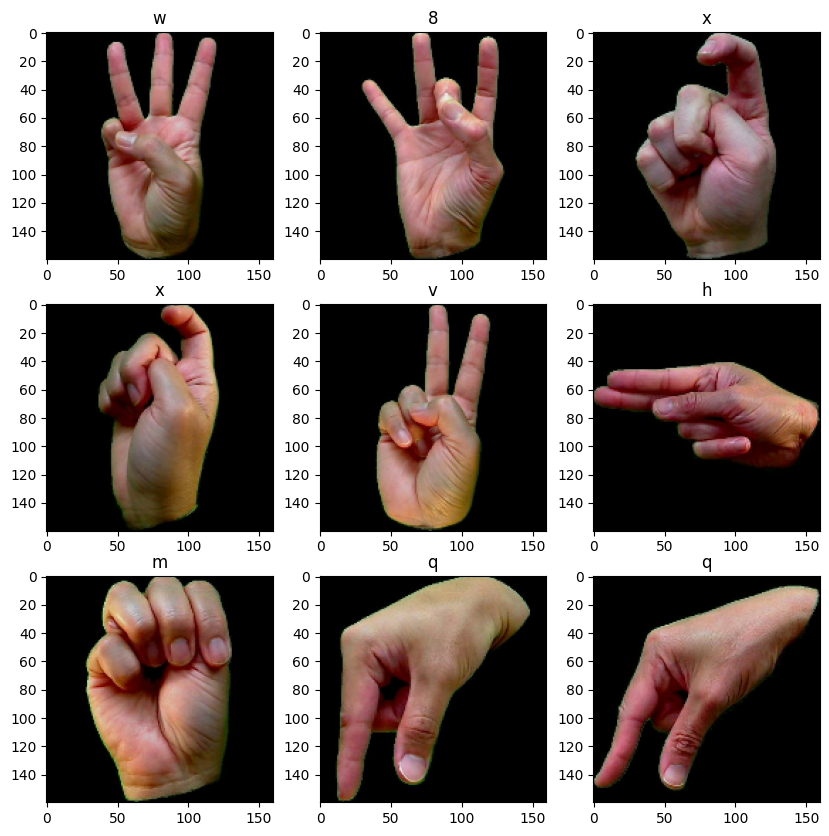

In [7]:
def visualize_images(dataset, class_names):
  plt.figure(figsize=(10,10))
  for images,labels in dataset.take(1):
    for i in range(9):
      ax = plt.subplot(3,3,i+1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
  plt.show()

class_names = train_dataset.class_names
visualize_images(train_dataset, class_names)


# 2) Declare model and layers

In [ ]:
model = Sequential()
#Block 1
model.add(Conv2D(16,3,padding = 'same' , activation = 'relu' , input_shape= (160,160,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#Block 2
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
############# Classification Layer ################
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36,activation='softmax'))

* Initially having few layers for modelling

Model summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 160, 160, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 80, 80, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 80, 80, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,563,460 (25.04 MB)

 Trainable params: 6,563,460 (25.04 MB)

 Non-trainable params: 0 (0.00 B)

# 3) Compile the model

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 4) Fit the model

In [ ]:
hist = model.fit(train_dataset,epochs=10,validation_data=val_dataset)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.0450 - loss: 78.8883 - val_accuracy: 0.1238 - val_loss: 3.1201
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.0998 - loss: 3.2622 - val_accuracy: 0.2221 - val_loss: 2.8547
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.1438 - loss: 3.1150 - val_accuracy: 0.2829 - val_loss: 2.5593
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.1778 - loss: 2.9034 - val_accuracy: 0.3635 - val_loss: 2.3000
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.2184 - loss: 2.8055 - val_accuracy: 0.3724 - val_loss: 2.1590
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.2392 - loss: 2.6953 - val_accuracy: 0.3912 - val_loss: 2.0328
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.2427 - loss: 2.5772 - val_accuracy: 0.4453 - val_loss: 1.9485
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2573 - loss: 2.5525 - val_accuracy: 0.4696 - val_los

# 5) Evaluate the model

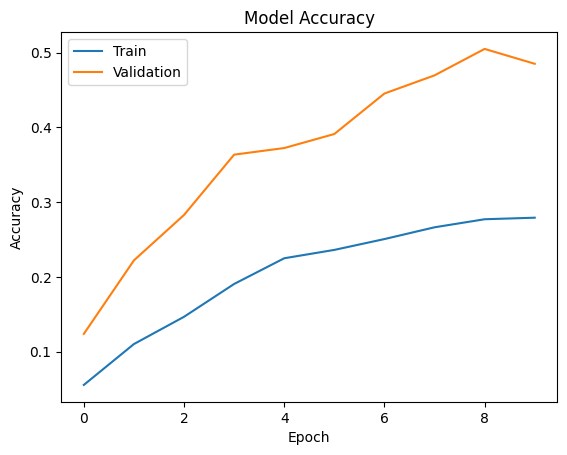

In [ ]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

plot_accuracy(hist)


The model accuracy graph shows that the model's accuracy on the training data (blue line) increases steadily with each epoch, reaching a peak around epoch 8.

However, the validation accuracy (orange line) starts to plateau after epoch 4, and even decreases slightly towards the end of training.

This suggests that the model is overfitting to the training data, and may not generalize well to new, unseen data.

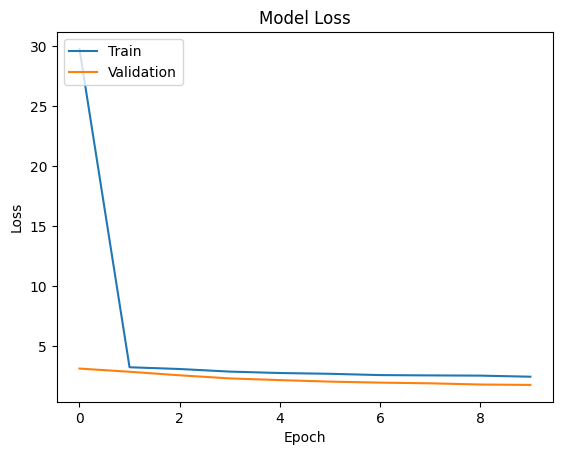

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

plot_loss(hist)


The model loss graph shows that the model's loss on both the training and validation data decreases significantly in the first few epochs.

However, the validation loss starts to increase after epoch 1, while the training loss continues to decrease.

This indicates that the model is overfitting to the training data, and may not generalize well to new, unseen data.

In [ ]:
y_hat_train = model.predict(train_dataset)
y_hat_val = model.predict(val_dataset)

38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 534ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 421ms/step


In [ ]:
y_true_train = np.array([label.numpy() for _, labels in train_dataset for label in labels])

In [ ]:
y_true_val = np.array([label.numpy() for _, labels in val_dataset for label in labels])

In [ ]:
y_true_train

array([12, 15, 29, ..., 25,  3, 26], dtype=int32)

In [ ]:
y_true_val

array([21, 21,  2,  5,  8, 30, 24, 11, 32, 16, 32, 19, 14, 32, 27, 31, 10,
        1, 20, 12, 11,  1, 23, 19, 12, 33, 26, 14, 10,  7, 16, 30,  4, 21,
        3, 18, 28,  0, 29,  7, 13,  9, 12, 23,  4, 15, 35,  1,  7, 11,  8,
       17, 22, 26, 26, 35, 23,  3, 34,  8, 18, 20, 32, 28, 30, 21,  4, 21,
       30,  9,  4,  6, 20, 34, 27, 16, 17, 26, 15, 13, 33, 13, 20, 26, 27,
       16, 17, 12, 34, 28, 34, 13, 31, 33, 23, 20, 23, 32, 22, 33,  7,  8,
       17, 13,  4, 24, 19, 15, 17, 27, 15, 34, 22, 29, 29, 35, 29, 27, 30,
       28, 18, 15, 10, 21, 28,  7, 27, 23, 31, 30, 23, 26,  9, 28,  2, 10,
       12,  6, 22, 12, 23, 35,  1, 22, 19,  6,  9, 18, 24, 17, 34, 29, 11,
        1, 33, 20, 16,  1, 13,  7,  5,  6, 28, 35, 25, 33, 15,  6,  3, 30,
       15, 20, 22, 10, 13, 14,  9,  2, 16, 17, 15, 28, 18,  0, 14, 14,  2,
        1, 28, 23, 20,  3,  8, 21,  4,  7, 24,  5,  9, 33,  8,  6, 19, 29,
        5, 31,  7, 27, 24, 11, 21, 24, 32, 17, 26, 14,  3,  1, 10, 27, 29,
        6,  3,  6, 30, 11

In [ ]:
model.save('model_new.keras')

# 6)Increasing neurons for better performance

## 6.1) Declare model and layers

In [ ]:
model = Sequential()
#Block 1
model.add(Conv2D(64,3,padding = 'same' , activation = 'relu' , input_shape= (160,160,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#Block 2
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#Block 3
model.add(Conv2D(256,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
############# Classification Layer ################
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36,activation='softmax'))

* The model's learning capacity has been enhanced by increasing the number of layers in the convolutional neural network (CNN).
* The architecture now features three convolutional blocks with 64, 128, and 256 filters, each followed by max pooling to reduce spatial dimensions.
* After flattening the output, a dense layer with 128 units and a dropout layer (0.5) have been added to prevent overfitting.
* The final output layer consists of 36 units with a softmax activation function for classification. This deeper architecture is designed to improve performance on complex datasets.

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 160, 160, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 80, 80, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 80, 80, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 40, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 40, 40, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 102400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      13,107,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,482,788 (51.43 MB)

 Trainable params: 13,482,788 (51.43 MB)

 Non-trainable params: 0 (0.00 B)

## 6.2) Compile the model

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## 6.3) Fit the model

In [ ]:
hist = model.fit(train_dataset,epochs=10,validation_data=val_dataset)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 527ms/step - accuracy: 0.2037 - loss: 31.7321 - val_accuracy: 0.8619 - val_loss: 0.5781
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.7057 - loss: 0.9693 - val_accuracy: 0.9514 - val_loss: 0.1861
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.8012 - loss: 0.6217 - val_accuracy: 0.9801 - val_loss: 0.0917
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.8538 - loss: 0.4667 - val_accuracy: 0.9890 - val_loss: 0.0654
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.8733 - loss: 0.4059 - val_accuracy: 0.9934 - val_loss: 0.0307
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.9041 - loss: 0.2917 - val_accuracy: 0.9923 - val_loss: 0.0245
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9204 - loss: 0.2719 - val_accuracy: 0.9901 - val_loss: 0.0448
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9313 - loss: 0.2162 - val_accuracy:

## 6.4) Evaluate the model

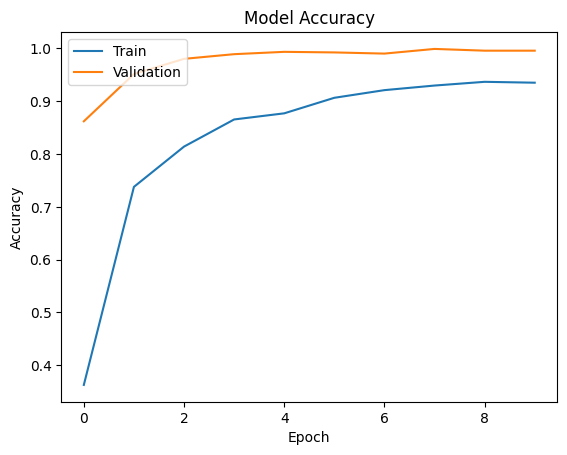

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

* The model accuracy graph shows that the model's accuracy on both the training and validation data increases steadily with each epoch, reaching a peak around epoch 8.
* The training and validation accuracy curves are relatively close, indicating that the model is generalizing well to new data.
* There is a slight gap between the two curves, suggesting that the model might be overfitting slightly.

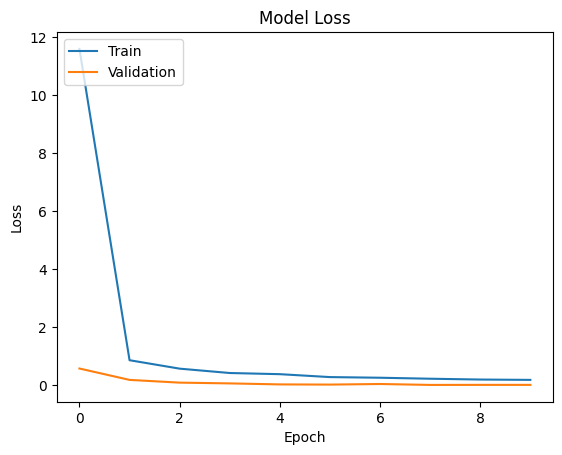

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

* The model loss graph shows that the model's loss on both the training and validation data decreases significantly in the first few epochs.
* This indicates that the model is learning effectively. The training loss continues to decrease steadily, while the validation loss plateaus after a few epochs.
* This suggests that the model is not overfitting to the training data and is generalizing well to new data.

# 7) Increasing the number of epochs for better performance

## 7.1) Declare model and layers

In [ ]:
model = Sequential()
#Block 1
model.add(Conv2D(128,3,padding = 'same' , activation = 'relu' , input_shape= (160,160,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#Block 2
model.add(Conv2D(256,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#Block 3
model.add(Conv2D(512,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
############# Classification Layer ################
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36,activation='softmax'))

* The model is structured as a convolutional neural network (CNN) with three convolutional blocks designed to enhance feature extraction.
* The first block uses 128 filters with a kernel size of 3 and 'same' padding, followed by max pooling to down-sample the feature maps.
* The second block increases the filter count to 256, while the third block further increases it to 512, each accompanied by max pooling layers.
* After the convolutional layers, the output is flattened, followed by a dense layer with 128 units and ReLU activation.
* A dropout layer with a rate of 0.5 is included to mitigate overfitting, leading to a final output layer of 36 units with a softmax activation function for classification tasks.

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 160, 160, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 80, 80, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 80, 80, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 40, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 204800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      26,214,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,370,340 (100.59 MB)

 Trainable params: 26,370,340 (100.59 MB)

 Non-trainable params: 0 (0.00 B)

## 7.2) Compile the model

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## 7.3) Fit the model

In [11]:
hist = model.fit(train_dataset,epochs=100,validation_data=val_dataset)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 588ms/step - accuracy: 0.1902 - loss: 90.6772 - val_accuracy: 0.8939 - val_loss: 0.3700
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.7421 - loss: 0.8616 - val_accuracy: 0.9790 - val_loss: 0.0837
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.8842 - loss: 0.3666 - val_accuracy: 0.9867 - val_loss: 0.0492
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.9175 - loss: 0.2626 - val_accuracy: 0.9912 - val_loss: 0.0310
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.9465 - loss: 0.1861 - val_accuracy: 0.9967 - val_loss: 0.0217
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.9322 - loss: 0.2169 - val_accuracy: 0.9967 - val_loss: 0.0153
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9544 - loss: 0.1374 - val_accuracy: 0.9967 - val_loss: 0.0127
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9610 - loss: 0.1253 - val

## 7.4) Evaluate the model

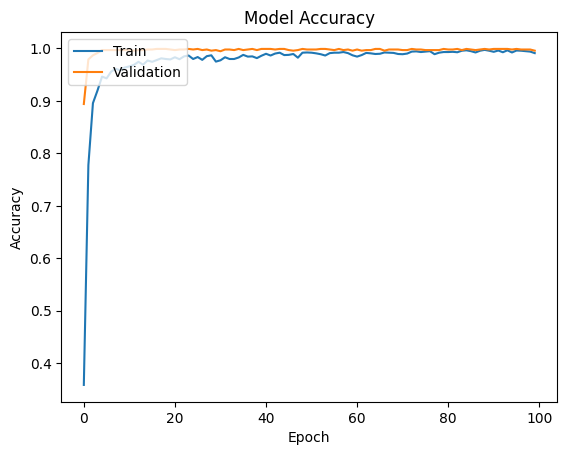

In [12]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

* The model accuracy graph shows that the model's accuracy on both the training and validation data increases rapidly in the initial epochs, then plateaus after around 20 epochs.
* The validation accuracy is slightly lower than the training accuracy, indicating some overfitting.
* However, the overall trend is positive, suggesting that the model is learning effectively and generalizing reasonably well to new data.

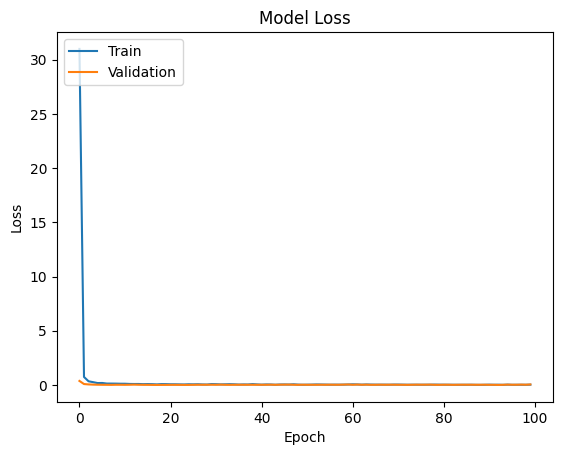

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

* The model loss graph shows that the model's loss on both the training and validation data decreases rapidly in the initial epochs, then plateaus after around 20 epochs.
* The validation loss is slightly higher than the training loss, indicating some overfitting.
* However, the overall trend is positive, suggesting that the model is learning effectively and generalizing reasonably well to new data.

# 8) Save the model

In [14]:
model.save('model.keras')

# 9) Deployment

In [15]:
import tensorflow as tf
import numpy as np
import gradio as gr

# Load the saved model
model = tf.keras.models.load_model('/content/model.keras')

# Class names for the 36 classes
class_names = ['0','1','2','3','4','5','6','7','8','9',
               'a','b','c','d','e','f','g','h','i','j',
               'k','l','m','n','o','p','q','r','s','t',
               'u','v','w','x','y','z']

# Define the function to classify the image and return the class with the highest probability
def classify_image(image):
    # Preprocess the image to the model's required input format
    img = tf.keras.preprocessing.image.img_to_array(image)
    img = tf.image.resize(img, (160, 160))  # Adjust this based on your model input size
    img = tf.expand_dims(img, 0)  # Add batch dimension

    # Get predictions (output will be probabilities for each class)
    prediction = model.predict(img)

    # Find the index of the class with the highest probability
    predicted_index = np.argmax(prediction, axis=1)[0]

    # Map the index to the class name
    predicted_class = class_names[predicted_index]

    # Return the predicted class name
    return predicted_class

# Create a Gradio interface
iface = gr.Interface(
    fn=classify_image,        # Function to call for classification
    inputs=gr.Image(),        # Input is an image
    outputs="text",           # Output is the predicted class name
    title="Image Classification",
    description="Upload an image and the model will classify it."
)

# Launch the Gradio app
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d84c4f15a6b0f69378.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
